Step 1: Understand the Objective
Goal: Understand survival patterns based on gender, age, class, etc.

Step 2: Load and Inspect the Dataset

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

In [22]:
df.head(5) #print first five rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df.info() #detail about the columns, non-null and data-type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [24]:
df.describe (include='all')  #statistics for all numerical columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.shape #return the no of rows and columns(rows,columns)

(891, 15)

In [26]:
df.isnull().sum() #check for total no of null values in each column

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Observation:
891 rows, 15 columns

Missing values in age, embarked, deck, embark_town



In [27]:
df.drop(columns=["deck"], inplace=True)  # too many missing
df.dropna(subset=["embarked"], inplace=True)  # drop rows with missing embark
df["age"].fillna(df["age"].median(), inplace=True)

/tmp/ipython-input-27-4146321564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)


Univariate Analysis

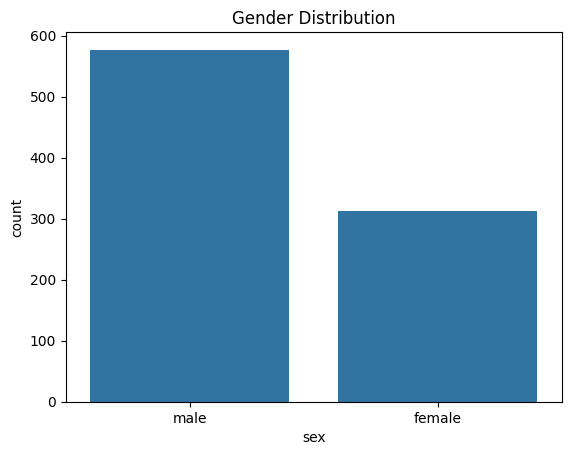

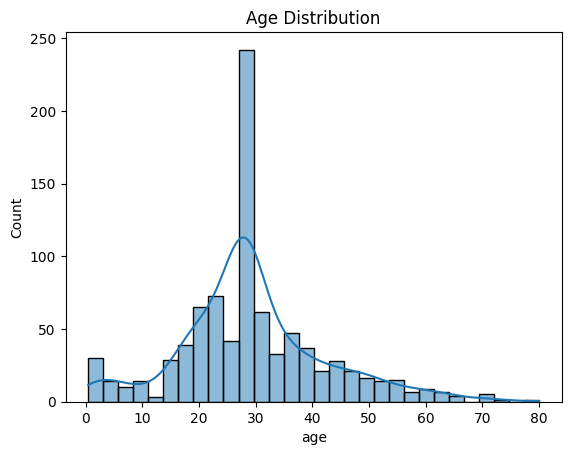

In [28]:
# Categorical
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

# Numerical
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

Observations:

More males than females.

Age is right-skewed. Many passengers between 20–40.

Bivariate Analysis

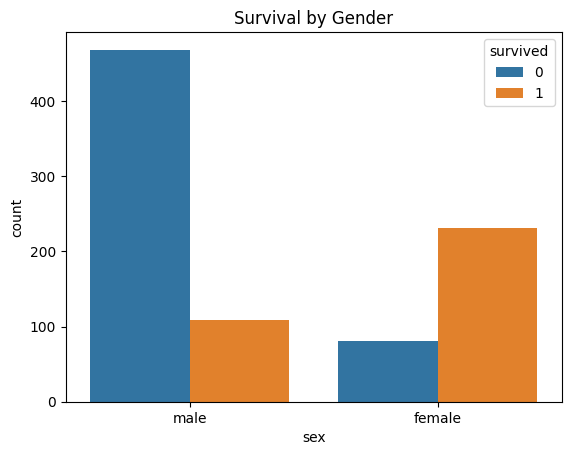

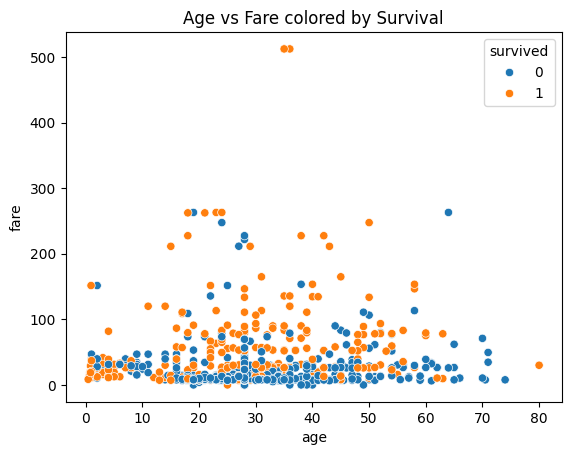

In [29]:
# Survival by Gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Age vs Fare
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare colored by Survival")
plt.show()

Observations:

More females survived than males.

High fare passengers (often 1st class) had better survival rates.

Multivariate Analysis

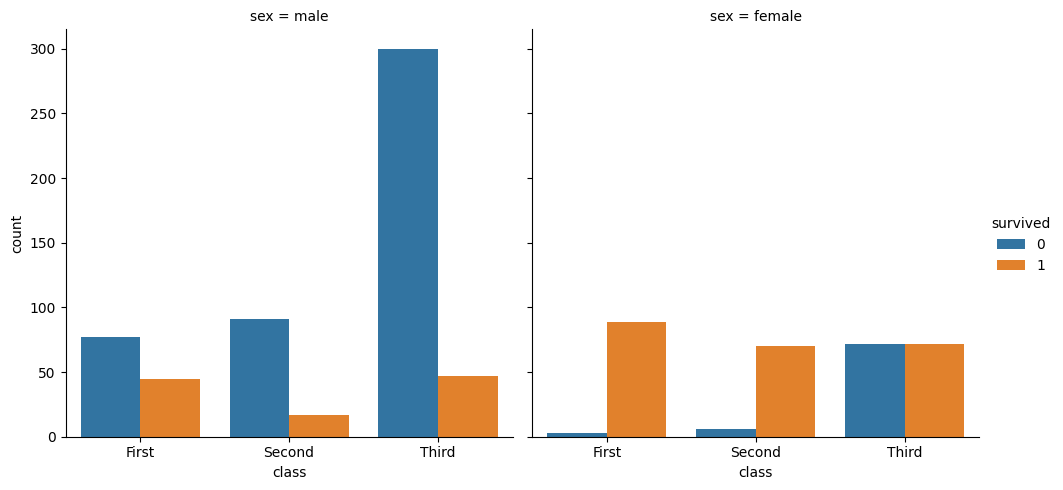

In [30]:
sns.catplot(x="class", hue="survived", col="sex", kind="count", data=df)

Observation:

Female from 1st class had highest survival.

Male from 3rd class had lowest survival.



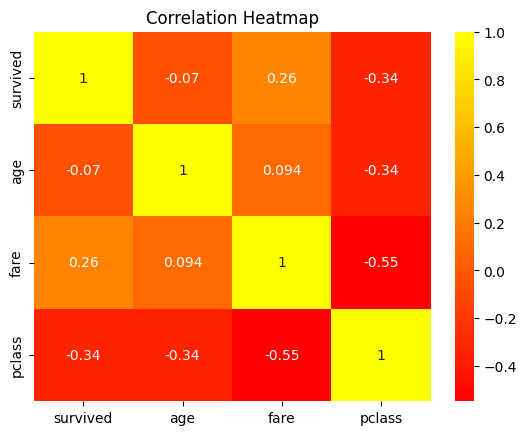

In [32]:
#correlation matrix
corr = df[['survived', 'age', 'fare', 'pclass']].corr()
sns.heatmap(corr, annot=True, cmap="autumn")
plt.title("Correlation Heatmap")
plt.show()

Observation:

Fare and pclass are negatively correlated.

Survived has a weak positive correlation with fare.

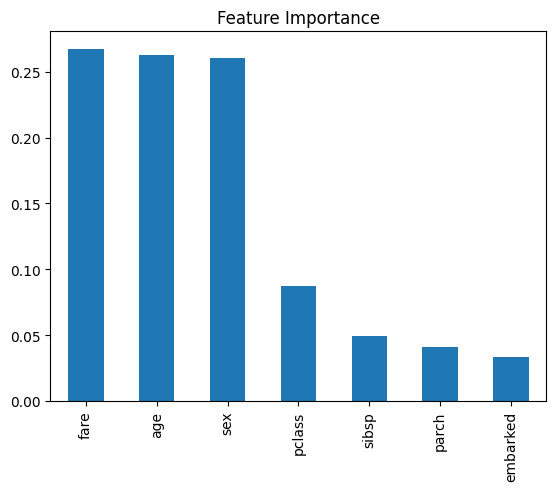

In [19]:
#Feature Importance (Using RandomForest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_ml = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]].copy()
for col in ["sex", "embarked"]:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

# Train the model
X = df_ml.drop("survived", axis=1)
y = df_ml["survived"]
model = RandomForestClassifier().fit(X, y)

# Feature importance plotting
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance')
plt.show()

Observation:

Top features: sex, fare, pclass, and age

Summary:

1.Gender strongly influences survival (females more likely to survive).

2.Class and Fare also play important roles.

3.Most passengers were in their 20s and 30s.

4.3rd class males had the highest fatality.

5.Feature importance and correlation confirm these patterns.